# **Vietnam Housing Dataset (Hanoi)**

## **1. Tiền xử lý dữ liệu:**

### **1.1. Đọc file dữ liệu:**

In [117]:
import pandas as pd
import numpy as np

In [118]:
df=pd.read_csv("Vn_housing.csv")
df.head()

,Unnamed: 0,Ngày,Địa chỉ,Quận,Huyện,Loại hình nhà ở,Giấy tờ pháp lý,Số tầng,Số phòng ngủ,Diện tích,Dài,Rộng,Giá/m2
0,0.0,2020-08-05,"Đường Hoàng Quốc Việt, Phường Nghĩa Đô, Quận C...",Quận Cầu Giấy,Phường Nghĩa Đô,"Nhà ngõ, hẻm",Đã có sổ,4,5 phòng,46 m²,NaN,NaN,"86,96 triệu/m²"
1,1.0,2020-08-05,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...",Quận Thanh Xuân,Phường Kim Giang,"Nhà mặt phố, mặt tiền",NaN,NaN,3 phòng,37 m²,NaN,NaN,"116,22 triệu/m²"
2,2.0,2020-08-05,"phố minh khai, Phường Minh Khai, Quận Hai Bà T...",Quận Hai Bà Trưng,Phường Minh Khai,"Nhà ngõ, hẻm",Đã có sổ,4,4 phòng,40 m²,10 m,4 m,65 triệu/m²
3,3.0,2020-08-05,"Đường Võng Thị, Phường Thụy Khuê, Quận Tây Hồ,...",Quận Tây Hồ,Phường Thụy Khuê,"Nhà ngõ, hẻm",Đã có sổ,NaN,6 phòng,51 m²,12.75 m,4 m,100 triệu/m²
4,4.0,2020-08-05,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...",Quận Thanh Xuân,Phường Kim Giang,"Nhà ngõ, hẻm",NaN,NaN,4 phòng,36 m²,9 m,4 m,"86,11 triệu/m²"


**Số dòng, số cột:**

In [119]:
number_rows, number_cols = df.shape
print("Số hàng: ", number_rows)
print("Số cột: ", number_cols)

Số hàng:  82497
Số cột:  13


**Ý nghĩa của mỗi dòng:** thông tin về giá nhà ở một khu vực ở Hà nội.

In [120]:
df.head(1)

,Unnamed: 0,Ngày,Địa chỉ,Quận,Huyện,Loại hình nhà ở,Giấy tờ pháp lý,Số tầng,Số phòng ngủ,Diện tích,Dài,Rộng,Giá/m2
0,0.0,2020-08-05,"Đường Hoàng Quốc Việt, Phường Nghĩa Đô, Quận C...",Quận Cầu Giấy,Phường Nghĩa Đô,"Nhà ngõ, hẻm",Đã có sổ,4,5 phòng,46 m²,NaN,NaN,"86,96 triệu/m²"


**Ý nghĩa mỗi cột:** 

In [121]:
list(df.columns)

['Unnamed: 0',
 'Ngày',
 'Địa chỉ',
 'Quận',
 'Huyện',
 'Loại hình nhà ở',
 'Giấy tờ pháp lý',
 'Số tầng',
 'Số phòng ngủ',
 'Diện tích',
 'Dài',
 'Rộng',
 'Giá/m2']

Xóa cột `Unnamed: 0` không cần thiết:

In [122]:
df=df.drop(columns='Unnamed: 0')

**Kiểu dữ liệu của cột sau khi xóa:**

In [123]:
df.dtypes

Ngày               object
Địa chỉ            object
Quận               object
Huyện              object
Loại hình nhà ở    object
Giấy tờ pháp lý    object
Số tầng            object
Số phòng ngủ       object
Diện tích          object
Dài                object
Rộng               object
Giá/m2             object
dtype: object

Các cột `Ngày`, `Số tầng`, `Số phòng ngủ`, `Diện tích`, `Dài`, `Rộng`, `Giá/m2` có kiểu dữ liệu chưa đúng, ta sẽ tiến hành tiền xử lý để đưa về đúng kiểu dữ liệu theo từng bước sau:

In [124]:
df['Ngày'] = pd.to_datetime(df['Ngày'])
df['Day_Of_Week'] = df['Ngày'].dt.day_name()
df['Ngày'] = df['Ngày'].astype(str)
def get_years(df, column):
    return df[column].apply(lambda date: date[0:4])

def get_months(df, column):
    return df[column].apply(lambda date: date[5:7])

# get the month and year
df['Month'] = get_months(df, 'Ngày')
df['Year'] = get_years(df, 'Ngày')

# Drop original columns
df = df.drop(['Ngày'], axis=1)

df.head(3)

,Địa chỉ,Quận,Huyện,Loại hình nhà ở,Giấy tờ pháp lý,Số tầng,Số phòng ngủ,Diện tích,Dài,Rộng,Giá/m2,Day_Of_Week,Month,Year
0,"Đường Hoàng Quốc Việt, Phường Nghĩa Đô, Quận C...",Quận Cầu Giấy,Phường Nghĩa Đô,"Nhà ngõ, hẻm",Đã có sổ,4,5 phòng,46 m²,NaN,NaN,"86,96 triệu/m²",Wednesday,08,2020
1,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...",Quận Thanh Xuân,Phường Kim Giang,"Nhà mặt phố, mặt tiền",NaN,NaN,3 phòng,37 m²,NaN,NaN,"116,22 triệu/m²",Wednesday,08,2020
2,"phố minh khai, Phường Minh Khai, Quận Hai Bà T...",Quận Hai Bà Trưng,Phường Minh Khai,"Nhà ngõ, hẻm",Đã có sổ,4,4 phòng,40 m²,10 m,4 m,65 triệu/m²,Wednesday,08,2020


### **1.2. Kiểm tra trùng lặp dữ liệu:**

Kiểm tra dữ liệu xem có tồn tại dòng dữ liệu nào bị trùng lặp hay không và thực hiện xóa:

In [125]:
sum(df.duplicated())

1091

In [126]:
df=df.drop_duplicates()

### **1.3. Kiểm tra dữ liệu bị thiếu:**

Tỉ lệ giá trị bị thiếu ở mỗi cột:

In [127]:
df.isnull().sum() / len(df)

Địa chỉ            0.000590
Quận               0.000025
Huyện              0.000590
Loại hình nhà ở    0.000393
Giấy tờ pháp lý    0.347223
Số tầng            0.555536
Số phòng ngủ       0.000479
Diện tích          0.000025
Dài                0.757561
Rộng               0.566654
Giá/m2             0.000160
Day_Of_Week        0.000012
Month              0.000000
Year               0.000000
dtype: float64

Mỗi cột đều có giá trị thiếu, đầu tiên ta sẽ thực hiện xóa những dòng có nhiều hơn 50% giá trị bị thiếu so với các cột:

In [128]:
df.dropna(thresh=df.shape[1] - 5, inplace=True)

In [129]:
df.isnull().sum() / len(df)

Địa chỉ            0.000270
Quận               0.000012
Huyện              0.000233
Loại hình nhà ở    0.000332
Giấy tờ pháp lý    0.346982
Số tầng            0.555373
Số phòng ngủ       0.000455
Diện tích          0.000012
Dài                0.757471
Rộng               0.566494
Giá/m2             0.000147
Day_Of_Week        0.000000
Month              0.000000
Year               0.000000
dtype: float64

#### **Tiến hành điền giá trị thiếu:**

**Cột `Giá`:**

In [130]:
df[df["Giá/m2"].isnull()].shape[0]

12

Có 12 dòng bị thiếu, ta sẽ xóa những dòng này.

In [131]:
df.dropna(subset=['Giá/m2'], inplace=True)

Cột `Quận:`

In [132]:
df[df["Quận"].isnull()]

,Địa chỉ,Quận,Huyện,Loại hình nhà ở,Giấy tờ pháp lý,Số tầng,Số phòng ngủ,Diện tích,Dài,Rộng,Giá/m2,Day_Of_Week,Month,Year
48418,"68, Ngọc Hồi, Hà Nội",NaN,NaN,"Nhà ngõ, hẻm",Đã có sổ,NaN,2 phòng,71 m²,6 m,6 m,43 triệu/m²,Friday,07,2020


In [133]:
df.loc[48418, 'Quận'] = 'Thanh Trì'
df.loc[48418, 'Huyện'] = 'Ngọc Hồi'

**Cột Huyện**:

In [134]:
df[df["Huyện"].isnull()]

,Địa chỉ,Quận,Huyện,Loại hình nhà ở,Giấy tờ pháp lý,Số tầng,Số phòng ngủ,Diện tích,Dài,Rộng,Giá/m2,Day_Of_Week,Month,Year
324,"Đường An Dương Vương, Quận Tây Hồ, Hà Nội",Quận Tây Hồ,NaN,"Nhà ngõ, hẻm",Đã có sổ,4,4 phòng,77 m²,11 m,7 m,"97,4 triệu/m²",Tuesday,08,2020
741,"Cầu Khê Tang, Quận Hà Đông, Hà Nội",Quận Hà Đông,NaN,"Nhà ngõ, hẻm",NaN,NaN,3 phòng,36 m²,NaN,NaN,"43,06 triệu/m²",Tuesday,08,2020
8584,NaN,Quận Thanh Xuân,NaN,"Nhà ngõ, hẻm",Đã có sổ,5,4 phòng,33 m²,NaN,4.1 m,"90,91 triệu/m²",Friday,07,2020
29300,"Đường Cầu Giấy, Quận Cầu Giấy, Hà Nội",Quận Cầu Giấy,NaN,"Nhà ngõ, hẻm",Đã có sổ,4,3 phòng,24 m²,NaN,NaN,"129,17 triệu/m²",Saturday,07,2020
35553,"Đường Thịnh Hào 3, Quận Đống Đa, Hà Nội",Quận Đống Đa,NaN,"Nhà ngõ, hẻm",Đã có sổ,NaN,6 phòng,36 m²,NaN,NaN,100 triệu/m²,Tuesday,07,2020
40906,"Đường Kim Giang, Quận Thanh Xuân, Hà Nội",Quận Thanh Xuân,NaN,"Nhà mặt phố, mặt tiền",NaN,NaN,4 phòng,40 m²,NaN,NaN,"82,5 triệu/m²",Thursday,07,2020
46176,"Đường Cầu Giấy, Quận Cầu Giấy, Hà Nội",Quận Cầu Giấy,NaN,"Nhà ngõ, hẻm",NaN,NaN,4 phòng,50 m²,NaN,NaN,80 triệu/m²,Monday,07,2020
54426,"Đường Trần Duy Hưng, Quận Cầu Giấy, Hà Nội",Quận Cầu Giấy,NaN,"Nhà ngõ, hẻm",Đã có sổ,5,4 phòng,40 m²,NaN,NaN,140 triệu/m²,Monday,06,2020
58641,"Đường Bùi Xương Trạch, Quận Thanh Xuân, Hà Nội",Quận Thanh Xuân,NaN,"Nhà ngõ, hẻm",NaN,NaN,3 phòng,31 m²,NaN,NaN,"116,13 triệu/m²",Thursday,06,2020
61781,"Đường Tôn Thất Tùng, Quận Đống Đa, Hà Nội",Quận Đống Đa,NaN,"Nhà ngõ, hẻm",NaN,NaN,3 phòng,37 m²,NaN,NaN,"110,81 triệu/m²",Tuesday,06,2020


Có vẻ như các giá trị bị thiếu là do địa chỉ đó thật sự không có `Huyện`. Ta sẽ điền giá trị bị thiếu bằng giá trị tương ứng trong cột `Quận`

In [135]:
df['Huyện'].fillna(df['Quận'], inplace=True)

**Cột `Địa chỉ`:**

Điền giá trị bị thiếu cho cột `Địa chỉ` = `Huyện` + `Quận` + `Thành phố`:

In [136]:
def fill_missing_address(row):
    huyen = row['Huyện']
    quan = row['Quận']
    
    if pd.notnull(huyen) and pd.notnull(quan):
        return huyen + ', ' + quan + ', ' 
    elif pd.notnull(huyen):
        return huyen + ', ' 
    else:
        return quan + ', '


df['Địa chỉ'] = df.apply(fill_missing_address, axis=1)

**Cột: `Loại hình nhà ở`:**

In [137]:
df[df["Loại hình nhà ở"].isnull()].shape[0]

27

In [138]:
df["Loại hình nhà ở"].fillna("Không rõ", inplace=True)

**Cột: `Giấy tờ pháp lý`:**

In [139]:
df[df['Giấy tờ pháp lý'].isnull()].shape[0]

28232

In [140]:
df['Giấy tờ pháp lý'].fillna("Không rõ", inplace=True)

**Cột: `Số tầng`:**

In [141]:
df[df['Số tầng'].isnull()].shape[0]

45186

In [142]:
df['Số tầng'].fillna(1, inplace=True)

**Cột: `Số phòng ngủ`:**

In [143]:
df[df["Số phòng ngủ"].isnull()].shape[0]

37

In [144]:
df['Số phòng ngủ'].fillna('1', inplace=True)

**Cột: `Dài`, `Rộng`:**

Ta không có cơ sở để điền giá trị cho 2 cột này, tỉ lệ giá trị bị thiếu của 2 cột cũng lớn hơn 50%. Thực hiện xóa 2 cột này:

In [145]:
df=df.drop(columns=["Dài","Rộng"])

Tỉ lệ giá trị bị thiếu ở mỗi cột:

In [146]:
df.isnull().sum() / len(df)

Địa chỉ            0.0
Quận               0.0
Huyện              0.0
Loại hình nhà ở    0.0
Giấy tờ pháp lý    0.0
Số tầng            0.0
Số phòng ngủ       0.0
Diện tích          0.0
Giá/m2             0.0
Day_Of_Week        0.0
Month              0.0
Year               0.0
dtype: float64

### **1.4. Đưa các cột về đúng kiểu dữ liệu:**

In [147]:
df.dtypes

Địa chỉ            object
Quận               object
Huyện              object
Loại hình nhà ở    object
Giấy tờ pháp lý    object
Số tầng            object
Số phòng ngủ       object
Diện tích          object
Giá/m2             object
Day_Of_Week        object
Month              object
Year               object
dtype: object

- Cột `Ngày` cần chuyển về kiểu datetime.
- Cột `Số tầng`, `Số phòng ngủ`, `Diện tích`, `Giá/m2` cần chuyển về dạng sô.

Cột `Số tầng:`

In [148]:
df['Số tầng'].unique()

array(['4', 1, '6', '5', '7', '2', '3', '8', '1', '9', '50', '38', '35',
       '10', 'Nhiều hơn 10', '45', '33', '42', '25', '73', '12', '65',
       '55', '30', '14', '40', '52', '54', '32', '29'], dtype=object)

In [149]:
df.loc[df['Số tầng']=='Nhiều hơn 10','Số tầng']=11

In [150]:
df['Số tầng'] = df['Số tầng'].astype(int)

Cột `Số phòng ngủ:`

In [151]:
df["Số phòng ngủ"].unique()

array(['5 phòng', '3 phòng', '4 phòng', '6 phòng', 'nhiều hơn 10 phòng',
       '8 phòng', '2 phòng', '7 phòng', '9 phòng', '1 phòng', '10 phòng',
       '1'], dtype=object)

In [152]:
df.loc[df["Số phòng ngủ"]=='nhiều hơn 10 phòng','Số phòng ngủ']='11'

In [153]:
df["Số phòng ngủ"]=df["Số phòng ngủ"].str.replace('phòng', '')
df["Số phòng ngủ"]=df["Số phòng ngủ"].astype(int)

Cột `Diện tích:`

In [154]:
df["Diện tích"].unique()

array(['46 m²', '37 m²', '40 m²', '51 m²', '36 m²', '52 m²', '32 m²',
       '75 m²', '41 m²', '35 m²', '30 m²', '50 m²', '52.8 m²', '165 m²',
       '70 m²', '34 m²', '65 m²', '45 m²', '79 m²', '90 m²', '73 m²',
       '18 m²', '42 m²', '43 m²', '25 m²', '38 m²', '49 m²', '33 m²',
       '120 m²', '200 m²', '47 m²', '55 m²', '77 m²', '27 m²', '60 m²',
       '81 m²', '20 m²', '54 m²', '28 m²', '113 m²', '76 m²', '62 m²',
       '11 m²', '44 m²', '21 m²', '58 m²', '196 m²', '48 m²', '24 m²',
       '56 m²', '104 m²', '83 m²', '68 m²', '31 m²', '64 m²', '32.1 m²',
       '185 m²', '61 m²', '23 m²', '92 m²', '85 m²', '30.2 m²', '26 m²',
       '140 m²', '31.5 m²', '63 m²', '39 m²', '80 m²', '57 m²', '16 m²',
       '13 m²', '67 m²', '35.22 m²', '110 m²', '35.21 m²', '138 m²',
       '3 m²', '40.22 m²', '22 m²', '32.22 m²', '82 m²', '53 m²', '86 m²',
       '47.3 m²', '33.33 m²', '87 m²', '96 m²', '66 m²', '451 m²',
       '108 m²', '32.07 m²', '125 m²', '33.1 m²', '39.8 m²', '36.5 m²',
 

In [155]:
df["Diện tích"]=df["Diện tích"].str.replace('m²', '')
df["Diện tích"]=df["Diện tích"].astype(float)

In [156]:
import matplotlib.pyplot as plt

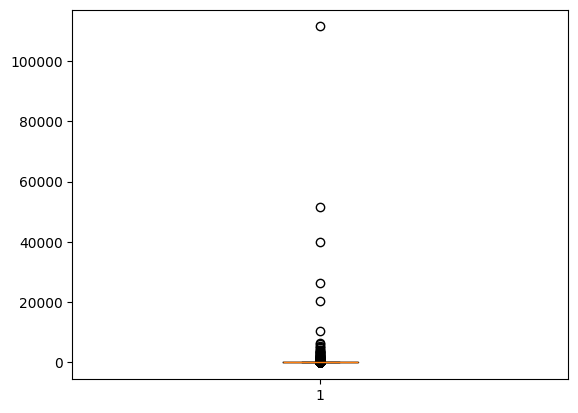

In [157]:
plt.boxplot(df["Diện tích"])
plt.show()

Có khá nhiều outlier, ta sẽ tìm và loại bỏ bớt.

In [158]:
df[df['Diện tích'] <= df['Diện tích'].quantile(0.0005)]
df.head()

,Địa chỉ,Quận,Huyện,Loại hình nhà ở,Giấy tờ pháp lý,Số tầng,Số phòng ngủ,Diện tích,Giá/m2,Day_Of_Week,Month,Year
0,"Phường Nghĩa Đô, Quận Cầu Giấy,",Quận Cầu Giấy,Phường Nghĩa Đô,"Nhà ngõ, hẻm",Đã có sổ,4,5,46.0,"86,96 triệu/m²",Wednesday,08,2020
1,"Phường Kim Giang, Quận Thanh Xuân,",Quận Thanh Xuân,Phường Kim Giang,"Nhà mặt phố, mặt tiền",Không rõ,1,3,37.0,"116,22 triệu/m²",Wednesday,08,2020
2,"Phường Minh Khai, Quận Hai Bà Trưng,",Quận Hai Bà Trưng,Phường Minh Khai,"Nhà ngõ, hẻm",Đã có sổ,4,4,40.0,65 triệu/m²,Wednesday,08,2020
3,"Phường Thụy Khuê, Quận Tây Hồ,",Quận Tây Hồ,Phường Thụy Khuê,"Nhà ngõ, hẻm",Đã có sổ,1,6,51.0,100 triệu/m²,Wednesday,08,2020
4,"Phường Kim Giang, Quận Thanh Xuân,",Quận Thanh Xuân,Phường Kim Giang,"Nhà ngõ, hẻm",Không rõ,1,4,36.0,"86,11 triệu/m²",Wednesday,08,2020


In [159]:
df[df['Diện tích'] >= df['Diện tích'].quantile(0.9998)]
df.head()

,Địa chỉ,Quận,Huyện,Loại hình nhà ở,Giấy tờ pháp lý,Số tầng,Số phòng ngủ,Diện tích,Giá/m2,Day_Of_Week,Month,Year
0,"Phường Nghĩa Đô, Quận Cầu Giấy,",Quận Cầu Giấy,Phường Nghĩa Đô,"Nhà ngõ, hẻm",Đã có sổ,4,5,46.0,"86,96 triệu/m²",Wednesday,08,2020
1,"Phường Kim Giang, Quận Thanh Xuân,",Quận Thanh Xuân,Phường Kim Giang,"Nhà mặt phố, mặt tiền",Không rõ,1,3,37.0,"116,22 triệu/m²",Wednesday,08,2020
2,"Phường Minh Khai, Quận Hai Bà Trưng,",Quận Hai Bà Trưng,Phường Minh Khai,"Nhà ngõ, hẻm",Đã có sổ,4,4,40.0,65 triệu/m²,Wednesday,08,2020
3,"Phường Thụy Khuê, Quận Tây Hồ,",Quận Tây Hồ,Phường Thụy Khuê,"Nhà ngõ, hẻm",Đã có sổ,1,6,51.0,100 triệu/m²,Wednesday,08,2020
4,"Phường Kim Giang, Quận Thanh Xuân,",Quận Thanh Xuân,Phường Kim Giang,"Nhà ngõ, hẻm",Không rõ,1,4,36.0,"86,11 triệu/m²",Wednesday,08,2020


Dựa vào mối quan hệ giữa `Diện tích` và `Giá`, ta thấy các dòng ở trên hoàn toàn sai và ta sẽ thực hiện xóa chúng.

In [160]:
min_=df['Diện tích'].quantile(0.0005)
max_=df['Diện tích'].quantile(0.9998)

df=df[df['Diện tích'] >= min_]
df=df[df['Diện tích'] <= max_]

Cột `Giá`:

In [161]:
import re

Thêm cột `Đơn vị` để ghi nhận các `Giá` có đơn vị khác nhau:

In [162]:
df['Đơn vị'] = df['Giá/m2'].apply(lambda x: re.findall(r'[^\d.,]+', x)[0])
df['Đơn vị'].unique()

array([' triệu/m²', ' đ/m²', ' tỷ/m²'], dtype=object)

In [163]:
df[df["Đơn vị"]==' đ/m²']

,Địa chỉ,Quận,Huyện,Loại hình nhà ở,Giấy tờ pháp lý,Số tầng,Số phòng ngủ,Diện tích,Giá/m2,Day_Of_Week,Month,Year,Đơn vị
93,"Phường Cầu Diễn, Quận Nam Từ Liêm,",Quận Nam Từ Liêm,Phường Cầu Diễn,Nhà phố liền kề,Đã có sổ,5,4,113.0,247.787 đ/m²,Tuesday,08,2020,đ/m²
283,"Phường Kim Liên, Quận Đống Đa,",Quận Đống Đa,Phường Kim Liên,"Nhà ngõ, hẻm",Không rõ,1,3,42.0,90.476 đ/m²,Tuesday,08,2020,đ/m²
338,"Phường Ngọc Thụy, Quận Long Biên,",Quận Long Biên,Phường Ngọc Thụy,"Nhà ngõ, hẻm",Đã có sổ,1,3,140.0,178.571 đ/m²,Tuesday,08,2020,đ/m²
351,"Phường Tân Mai, Quận Hoàng Mai,",Quận Hoàng Mai,Phường Tân Mai,"Nhà mặt phố, mặt tiền",Đã có sổ,5,6,60.0,125.000 đ/m²,Tuesday,08,2020,đ/m²
621,"Phường Đồng Tâm, Quận Hai Bà Trưng,",Quận Hai Bà Trưng,Phường Đồng Tâm,"Nhà ngõ, hẻm",Đã có sổ,3,2,53.0,75.471 đ/m²,Tuesday,08,2020,đ/m²
...,...,...,...,...,...,...,...,...,...,...,...,...,...
82294,"Phường Xuân La, Quận Tây Hồ,",Quận Tây Hồ,Phường Xuân La,"Nhà ngõ, hẻm",Đã có sổ,6,5,49.0,59.183 đ/m²,Sunday,05,2020,đ/m²
82316,"Phường Láng Thượng, Quận Đống Đa,",Quận Đống Đa,Phường Láng Thượng,"Nhà ngõ, hẻm",Đã có sổ,1,4,45.0,85.555 đ/m²,Thursday,05,2020,đ/m²
82325,"Phường Ô Chợ Dừa, Quận Đống Đa,",Quận Đống Đa,Phường Ô Chợ Dừa,"Nhà ngõ, hẻm",Đã có sổ,1,4,38.0,86.842 đ/m²,Monday,05,2020,đ/m²
82344,"Phường Hoàng Văn Thụ, Quận Hoàng Mai,",Quận Hoàng Mai,Phường Hoàng Văn Thụ,"Nhà ngõ, hẻm",Không rõ,1,3,46.0,69.565 đ/m²,Monday,04,2020,đ/m²


In [164]:
df[df["Đơn vị"]==' tỷ/m²']

,Địa chỉ,Quận,Huyện,Loại hình nhà ở,Giấy tờ pháp lý,Số tầng,Số phòng ngủ,Diện tích,Giá/m2,Day_Of_Week,Month,Year,Đơn vị
1100,"Phường Khương Trung, Quận Thanh Xuân,",Quận Thanh Xuân,Phường Khương Trung,"Nhà ngõ, hẻm",Không rõ,1,3,36.0,"1,202777777 tỷ/m²",Tuesday,08,2020,tỷ/m²
1144,"Phường Láng Hạ, Quận Đống Đa,",Quận Đống Đa,Phường Láng Hạ,"Nhà ngõ, hẻm",Đã có sổ,5,3,35.0,"1,142857142 tỷ/m²",Tuesday,08,2020,tỷ/m²
1657,"Phường La Khê, Quận Hà Đông,",Quận Hà Đông,Phường La Khê,Nhà phố liền kề,Không rõ,1,6,5.0,"1,96 tỷ/m²",Tuesday,08,2020,tỷ/m²
2849,"Phường Thanh Xuân Trung, Quận Thanh Xuân,",Quận Thanh Xuân,Phường Thanh Xuân Trung,"Nhà ngõ, hẻm",Không rõ,1,2,35.0,"1,557142857 tỷ/m²",Monday,08,2020,tỷ/m²
3795,"Phường Hàng Bồ, Quận Hoàn Kiếm,",Quận Hoàn Kiếm,Phường Hàng Bồ,"Nhà mặt phố, mặt tiền",Đã có sổ,8,11,126.0,"1,111111111 tỷ/m²",Monday,08,2020,tỷ/m²
...,...,...,...,...,...,...,...,...,...,...,...,...,...
78107,"Xã Vân Canh, Huyện Hoài Đức,",Huyện Hoài Đức,Xã Vân Canh,"Nhà ngõ, hẻm",Đã có sổ,4,3,30.0,"5,833333333 tỷ/m²",Tuesday,06,2020,tỷ/m²
79034,"Phường Láng Thượng, Quận Đống Đa,",Quận Đống Đa,Phường Láng Thượng,"Nhà ngõ, hẻm",Đã có sổ,4,4,40.0,"1,0125 tỷ/m²",Tuesday,06,2020,tỷ/m²
79835,"Phường Nam Đồng, Quận Đống Đa,",Quận Đống Đa,Phường Nam Đồng,"Nhà ngõ, hẻm",Đã có sổ,1,3,45.0,"1,706666666 tỷ/m²",Monday,06,2020,tỷ/m²
80222,"Phường Lý Thái Tổ, Quận Hoàn Kiếm,",Quận Hoàn Kiếm,Phường Lý Thái Tổ,"Nhà mặt phố, mặt tiền",Không rõ,1,4,100.0,"1,5 tỷ/m²",Monday,06,2020,tỷ/m²


Chuyển đổi đơn vị về 'triệu/m²'

In [165]:
df['Giá/m2']=df['Giá/m2'].str.replace('.', '')
df['Giá/m2']=df['Giá/m2'].str.replace(',', '.')

In [166]:
df['Giá/m2'] = df['Giá/m2'].str.replace('đ/m²', '').str.replace('triệu/m²', '').str.replace('tỷ/m²', '')

In [167]:
df["Giá/m2"]=df["Giá/m2"].astype(float)

In [168]:
def convert_price(row):
    if row['Đơn vị'] == ' tỷ/m²':
        return row['Giá/m2'] * 1000
    elif row['Đơn vị'] == ' đ/m²':
        return row['Giá/m2'] * 0.000001
    else:
        return row['Giá/m2']

df['Giá/m2'] = df.apply(convert_price, axis=1)

df=df.drop(columns="Đơn vị")
df = df.rename(columns={'Giá/m2': 'Giá (triệu đồng/m2)'})

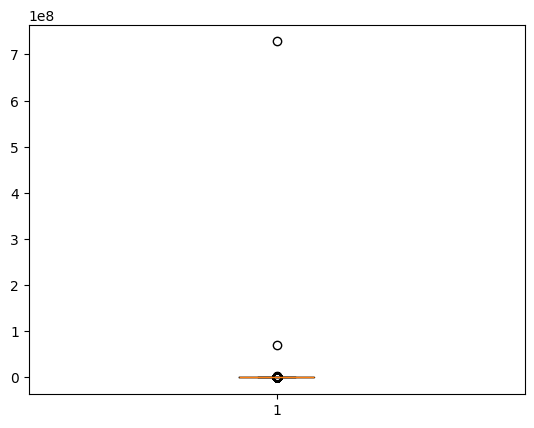

In [169]:
plt.boxplot(df["Giá (triệu đồng/m2)"])
plt.show()

Có khá nhiều outlier, ta sẽ tìm và loại bỏ bớt.

In [170]:
df['Lower Bound'] = df.groupby(['Quận'])['Giá (triệu đồng/m2)'].transform(lambda x: x.quantile(0.25) - 1.5 * (x.quantile(0.75) - x.quantile(0.25)))
df['Upper Bound'] = df.groupby(['Quận'])['Giá (triệu đồng/m2)'].transform(lambda x: x.quantile(0.75) + 1.5 * (x.quantile(0.75) - x.quantile(0.25)))


df = df[(df['Giá (triệu đồng/m2)'] >= df['Lower Bound']) & (df['Giá (triệu đồng/m2)'] <= df['Upper Bound'])]
df = df.drop(['Lower Bound', 'Upper Bound'], axis=1)

In [171]:
sum(df.duplicated())

1334

In [172]:
df=df.drop_duplicates()

### *Tạo file dữ liệu sau khi qua xử lý:*

In [173]:
new_file = r'C:/Users/Hoan/anaconda3/envs/test/Ha_Noi_St/file_new/du_lieu_lam_sach.csv'
# Lưu kết quả sau khi xử lý vào file CSV mới
df.to_csv(new_file, index=False)

### **2. Split dataset(X, Y):**

In [174]:
df_1 = pd.read_csv('file_new/du_lieu_lam_sach.csv')
df_1.head(2)

,Địa chỉ,Quận,Huyện,Loại hình nhà ở,Giấy tờ pháp lý,Số tầng,Số phòng ngủ,Diện tích,Giá (triệu đồng/m2),Day_Of_Week,Month,Year
0,"Phường Nghĩa Đô, Quận Cầu Giấy,",Quận Cầu Giấy,Phường Nghĩa Đô,"Nhà ngõ, hẻm",Đã có sổ,4,5,46.0,86.96,Wednesday,8,2020
1,"Phường Kim Giang, Quận Thanh Xuân,",Quận Thanh Xuân,Phường Kim Giang,"Nhà mặt phố, mặt tiền",Không rõ,1,3,37.0,116.22,Wednesday,8,2020


## feature_selection ##

In [175]:
features = ["Số tầng", "Số phòng ngủ", "Diện tích"]

In [176]:
X = df_1[features]
y = df_1["Giá (triệu đồng/m2)"]

In [177]:
X.head()

,Số tầng,Số phòng ngủ,Diện tích
0,4,5,46.0
1,1,3,37.0
2,4,4,40.0
3,1,6,51.0
4,1,4,36.0


In [178]:
y.head()

0     86.96
1    116.22
2     65.00
3    100.00
4     86.11
Name: Giá (triệu đồng/m2), dtype: float64

###  X, y --> X train, y_train, X_valid, y_valid

In [179]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid=train_test_split(X, y, train_size=0.8, test_size= 0.2, random_state= 0) 

In [180]:
X_train.shape #80% data

(58768, 3)

In [181]:
X.shape

(73461, 3)

In [182]:
X_valid.shape #20% data

(14693, 3)

In [183]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor(random_state=1)

In [184]:
#fit data to model 
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1)

In [185]:
y_preds = dt_model.predict(X_valid.head())

In [186]:
y_preds

array([ 91.18661462,  88.98510417, 117.69333333,  88.53238445,
        96.18382716])

In [187]:
pd.DataFrame({'y': y_valid.head(), 'y_preds': y_preds}) #so sánh thử giá trị của y ban đầu và y_preds

,y,y_preds
25582,66.67,91.186615
47389,43.75,88.985104
23069,121.54,117.693333
45618,97.06,88.532384
48534,88.33,96.183827


In [188]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [189]:
rf_model = RandomForestRegressor(random_state=1)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=1)

In [190]:
rf_val_preds = rf_model.predict(X_valid)
rf_val_preds[:5]

array([ 91.23092531,  88.76849621, 120.03246029,  88.61495945,
        96.26523274])

### Predict with a new input

In [191]:
X_valid.head()

,Số tầng,Số phòng ngủ,Diện tích
25582,1,3,30.0
47389,4,4,40.0
23069,1,8,65.0
45618,1,3,34.0
48534,5,3,30.0


In [201]:
rf_model.predict([[4, 4, 30.0]])

C:\Users\Hoan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([89.36318917])

In [193]:
from sklearn.metrics import mean_absolute_error, r2_score
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load data and train the model
# Replace this with your data loading and model training code
data = pd.read_csv("file_new/du_lieu_lam_sach.csv")
X = data[['Số tầng', 'Số phòng ngủ', 'Diện tích']]
y = data['Giá (triệu đồng/m2)']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_preds = model.predict(X_valid)

# Evaluate the model
mae = mean_absolute_error(y_valid, y_preds)
r2 = r2_score(y_valid, y_preds)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"R-squared: {r2:.2f}")


Mean Absolute Error: 22.63
R-squared: 0.05


## **3. Trực quan hóa dữ liệu:**

In [194]:
df_1 = pd.read_csv('file_new/du_lieu_lam_sach.csv')
df_1.head(2)

,Địa chỉ,Quận,Huyện,Loại hình nhà ở,Giấy tờ pháp lý,Số tầng,Số phòng ngủ,Diện tích,Giá (triệu đồng/m2),Day_Of_Week,Month,Year
0,"Phường Nghĩa Đô, Quận Cầu Giấy,",Quận Cầu Giấy,Phường Nghĩa Đô,"Nhà ngõ, hẻm",Đã có sổ,4,5,46.0,86.96,Wednesday,8,2020
1,"Phường Kim Giang, Quận Thanh Xuân,",Quận Thanh Xuân,Phường Kim Giang,"Nhà mặt phố, mặt tiền",Không rõ,1,3,37.0,116.22,Wednesday,8,2020


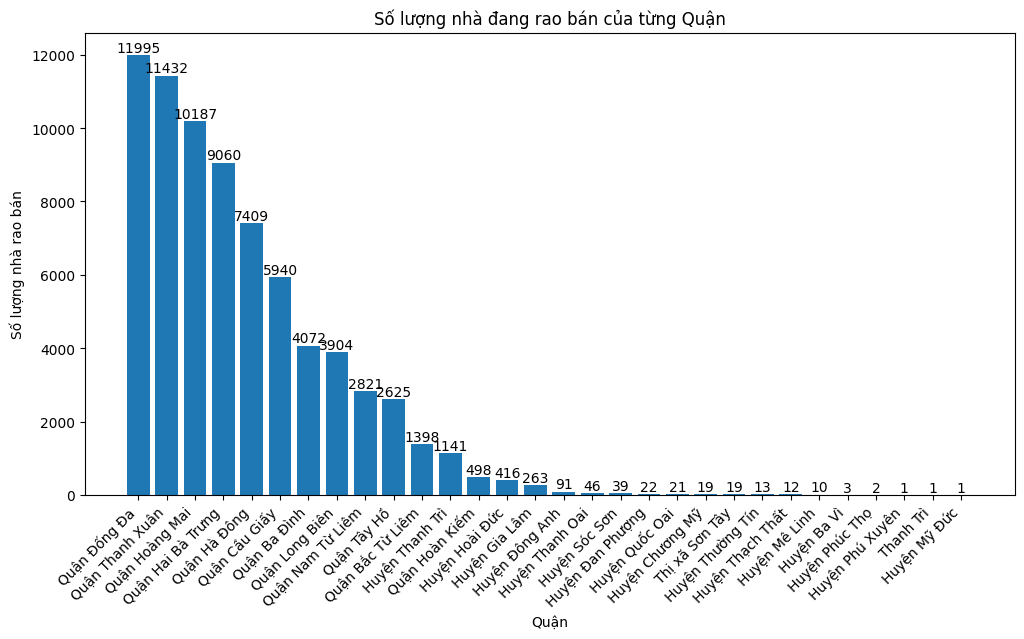

In [195]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc tập dữ liệu từ file CSV
df_1 = pd.read_csv('file_new/du_lieu_lam_sach.csv')

# Tính số lượng nhà đang rao bán của từng Quận
house_counts = df_1['Quận'].value_counts().reset_index()
house_counts.columns = ['Quận', 'Số lượng nhà rao bán']

# Vẽ biểu đồ cột
plt.figure(figsize=(12, 6))
bars = plt.bar(house_counts['Quận'], house_counts['Số lượng nhà rao bán'])
plt.title('Số lượng nhà đang rao bán của từng Quận')
plt.xlabel('Quận')
plt.ylabel('Số lượng nhà rao bán')
plt.xticks(rotation=45, ha='right')  # Để hiển thị tên Quận dọc

# Thêm chú thích số lượng lên trên từng cột
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')

plt.show()


In [196]:
df_1['Giá (triệu đồng/m2)'].describe()

count    73461.000000
mean        91.558903
std         36.489057
min          0.000001
25%         72.000000
50%         87.500000
75%        105.000000
max        907.410000
Name: Giá (triệu đồng/m2), dtype: float64